In [1]:
%pylab inline
import crystal
import pandas as pd
from scipy.optimize import minimize
import re
import cvxpy as cvx
mpl.rcParams['font.size'] = 16


scatter = lambda x,y,**kw: plt.scatter(x, y, edgecolors='k', facecolors='none', **kw)

Populating the interactive namespace from numpy and matplotlib


0.5

/home/kevin/opt/gammastimator/crystal.py:394: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  F['A'] = [self.A[:,0]]*len(F)
/home/kevin/opt/gammastimator/crystal.py:394: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  F['A'] = [self.A[:,0]]*len(F)
/home/kevin/opt/gammastimator/crystal.py:394: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vi

5.609382500085348


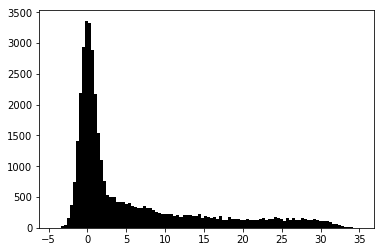

In [227]:
from importlib import reload
import simulate
reload(simulate)

F = simulate.shoot_crystal('test/1ubq.pdb.hkl', 'test/1ubq-flip.pdb.hkl')

_=hist(F['IOBS'] / F['SIGMA(IOBS)'], 100, color='k')

print(np.mean(F['IOBS']/ F['SIGMA(IOBS)']))

3.468166151823369


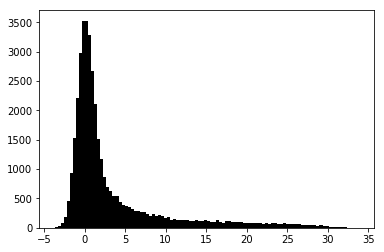

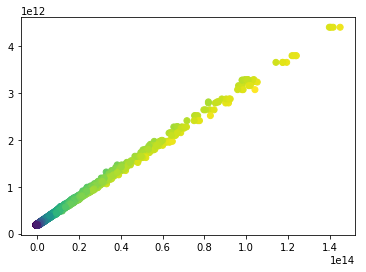

In [228]:
F['SIGMA(IOBS)'] = np.percentile(F['I'][F['I']>0.], 20) + 0.03*F['I']
F['IOBS'] = np.random.normal(F['I'], F['SIGMA(IOBS)'])

_=hist(F['IOBS'] / F['SIGMA(IOBS)'], 100, color='k')
print(np.mean(F['IOBS']/ F['SIGMA(IOBS)']))

figure()
plt.scatter(F['IOBS'], F['SIGMA(IOBS)'], c=F['IOBS']/F['SIGMA(IOBS)'])


In [7]:
reflectionFN = 'test/reflections.csv.bz2' #DHFR THz Data
referenceFN  = 'test/DHFR_P21_Reference_data.hkl.cns'
imagedataFN  = 'test/imagedata.csv.bz2'
c = crystal.crystal().read_hkl(referenceFN)
c.spacegroup=4
c.unmerge()

I = pd.read_csv(reflectionFN).sample(frac=0.01).set_index(['H', 'K', 'L'])
I = c.join(I, how='inner')
M = pd.read_csv(imagedataFN, index_col='Image#')
I = I.join(M, on='Image#')


In [49]:
I.keys()

Index(['FOBS', 'D', 'MERGEDH', 'MERGEDK', 'MERGEDL', 'ISEG', 'MAXC', 'IOBS',
       'SIGMA(IOBS)', 'POBS', 'XOBS', 'YOBS', 'XCAL', 'YCAL', 'Q', 'Image#',
       'file_name', 'wavelength', 'incident_beam_x', 'incident_beam_y',
       'incident_beam_z', 'A_x', 'A_y', 'A_z', 'B_x', 'B_y', 'B_z', 'C_x',
       'C_y', 'C_z', 'ORGX', 'ORGY', 'F', '#reflections', '#background_pixels',
       '#spot_pixels', '#strong_spots', '#spot_profiles', '#overloaded',
       'beam_divergence', 'sigma1', 'sigma2', 'rho', 'reflecting_range_esd_1',
       'reflecting_range_esd_2', 'ipm2', 'ipm3', 'ipm2_channels',
       'ipm3_channels', 'ipm2_xpos', 'ipm2_ypos', 'ipm3_xpos', 'ipm3_ypos'],
      dtype='object')

(0, 50)

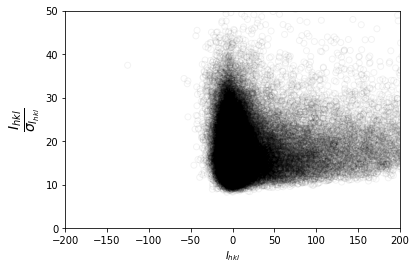

In [116]:

plt.figure()
plt.scatter(I['IOBS'], I['SIGMA(IOBS)'], facecolors='none', edgecolors='k', alpha=0.05)
plt.ylabel(r"$\frac {I_{hkl}} {\sigma_{I_{hkl}}}$", fontsize=20)
plt.xlabel(r"$I_{hkl}$")

plt.xlim(-200, 200)
plt.ylim(0, 50)

Mean I/SIG = 3.2423551830489803
Median I/SIG = 0.3952411575562701


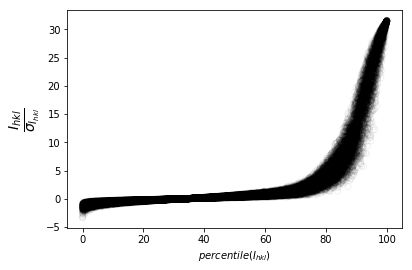

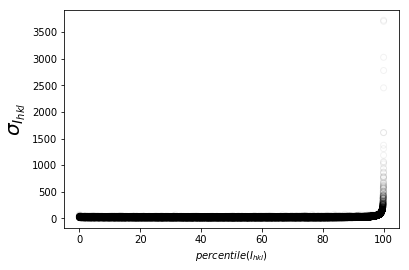

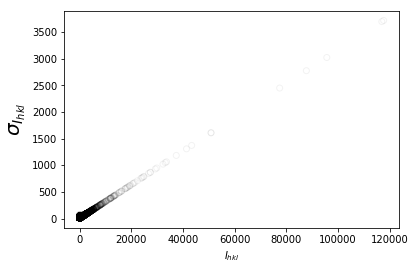

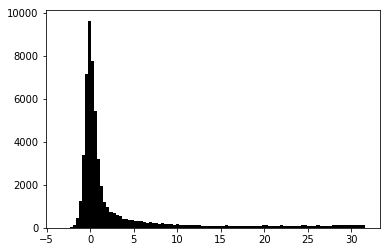

In [164]:
plt.figure()
x = np.array(I['IOBS'])
y = np.array(I['IOBS'])/np.array(I['SIGMA(IOBS)'])
plt.scatter(np.linspace(0, 100, len(x)), y[np.argsort(x)], facecolors='none', edgecolors='k', alpha=0.05)
plt.ylabel(r"$\frac {I_{hkl}} {\sigma_{I_{hkl}}}$", fontsize=20)
plt.xlabel(r"$percentile(I_{hkl})$")

plt.figure()
x = np.array(I['IOBS'])
y = np.array(I['SIGMA(IOBS)'])
plt.scatter(np.linspace(0, 100, len(x)), y[np.argsort(x)], facecolors='none', edgecolors='k', alpha=0.05)
plt.ylabel(r"$\sigma_{I_{hkl}}$", fontsize=20)
plt.xlabel(r"$percentile(I_{hkl})$")


plt.figure()
plt.scatter(I['IOBS'], I['SIGMA(IOBS)'], facecolors='none', edgecolors='k', alpha=0.05)
plt.ylabel(r"$\sigma_{I_{hkl}}$", fontsize=20)
plt.xlabel(r"$I_{hkl}$")

plt.figure()
_ = plt.hist(I['IOBS'] / I['SIGMA(IOBS)'], 100, color='k')

print("Mean I/SIG = {}".format(np.mean(I['IOBS']/I['SIGMA(IOBS)'])))
print("Median I/SIG = {}".format(np.median(I['IOBS']/I['SIGMA(IOBS)'])))

sigma = 0.028612591395956517*I + 16.036249853967256
2.9305081123737353
b / median(I) = 2.357925283629945
a / median(I) = 0.004207115335385461


Text(0.5,0,'Percent Error')

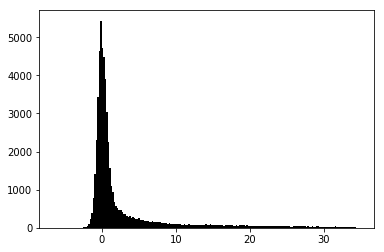

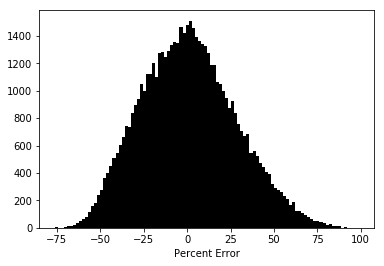

In [175]:
i = np.array(I['IOBS'])
s = np.array(I['SIGMA(IOBS)'])

v = cvx.Variable(2)
a,b = v
sig =  a*np.abs(i) + b

#cons = [msnr == 1./3., v>=0.]
cons = [v>=0.]
p = cvx.Problem(cvx.Minimize(cvx.norm1(s - a*np.abs(i) - b)), cons)
p.solve()

a,b = float(a.value), float(b.value)
#a,b = float(v.value[0]),float(v.value[1])
print("sigma = {}*I + {}".format(a, b))

sighat = a*np.abs(i) + b
snr = i/sighat
print(np.mean(snr))
_= plt.hist(snr, 200, color='k')

print("b / median(I) = {}".format(b/np.median(i)))

print("a / median(I) = {}".format(a/np.median(i)))

plt.figure()
plt.hist(100.*(sighat - s)/s, 100, color='k')
plt.xlabel('Percent Error')

sigma = 0.028612591395956517*I + 16.036249853967256
2.9305081123737353
b / median(I) = 2.357925283629945


Text(0.5,0,'Percent Error')

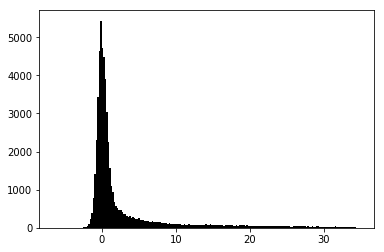

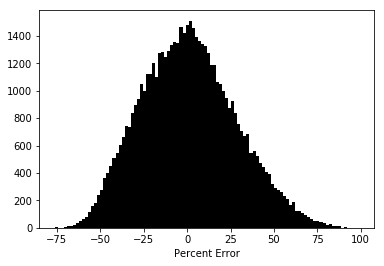

In [163]:
i = np.array(I['IOBS'])
s = np.array(I['SIGMA(IOBS)'])

b = 3*np.median(i)

a = cvx.Variable()
cons = [a*np.abs(i) + b == 
print("b / median(I) = {}".format(b/np.median(i)))

plt.figure()
plt.hist(100.*(sighat - s)/s, 100, color='k')
plt.xlabel('Percent Error')

In [137]:
np.mean(I['IOBS'] / (9.09*np.abs(I['IOBS']) + 3.7e-08))

0.03602033490398881

[Text(1,0,'5.19'),
 Text(1,0,'3.17'),
 Text(1,0,'2.49'),
 Text(1,0,'2.11'),
 Text(1,0,'1.87'),
 Text(1,0,'1.69')]

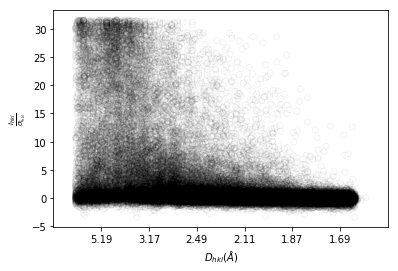

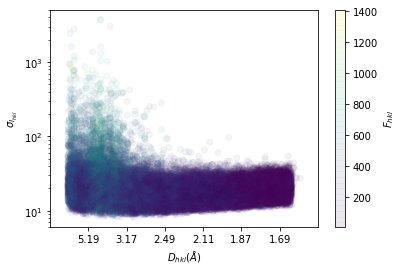

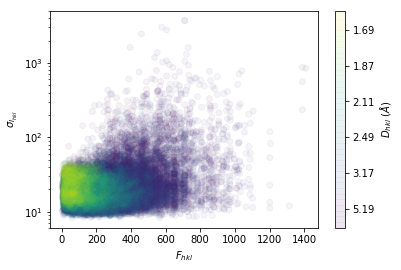

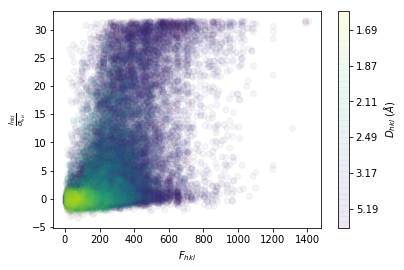

In [51]:
plt.figure()
plt.scatter(I['D']**-2, I['IOBS']/I['SIGMA(IOBS)'], facecolors='none', edgecolors='k', alpha=0.05)
plt.xlabel(r"$D_{hkl} (\AA)$")
xlim = plt.xlim()
ticks = np.linspace(xlim[0], xlim[1], 8)[1:-1]
plt.xlim(xlim)
plt.xticks(ticks, ['{:0.2f}'.format(i) for i in np.sqrt(1./ticks)])
plt.ylabel(r"$\frac {I_{hkl}} {\sigma_{I_{hkl}}}$")

plt.figure()
plt.scatter(I['D']**-2, I['SIGMA(IOBS)'], c=I['FOBS'], alpha=0.05)
plt.xlabel(r"$D_{hkl} (\AA)$")
xlim = plt.xlim()
ticks = np.linspace(xlim[0], xlim[1], 8)[1:-1]
plt.xlim(xlim)
ticklabels =  ['{:0.2f}'.format(i) for i in np.sqrt(1./ticks)]
plt.xticks(ticks, ['{:0.2f}'.format(i) for i in np.sqrt(1./ticks)])
plt.ylabel(r"$\sigma_{I_{hkl}}$")
plt.semilogy()
plt.colorbar(label=r"$F_{hkl}$")


plt.figure()
plt.scatter(I['FOBS'], I['SIGMA(IOBS)'], c=I['D']**(-2), alpha=0.05)
plt.xlabel(r"$F_{hkl}$")
plt.ylabel(r"$\sigma_{I_{hkl}}$")
cbar = plt.colorbar(label=r"$D_{hkl}\ (\AA)$", ticks = ticks)
cbar.ax.set_yticklabels(ticklabels)
plt.semilogy()


plt.figure()
plt.scatter(I['FOBS'], I['IOBS'] / I['SIGMA(IOBS)'], c=I['D']**(-2), alpha=0.05)
plt.xlabel(r"$F_{hkl}$")
plt.ylabel(r"$\frac{I_{hkl}} {\sigma_{I_{hkl}}}$")
cbar = plt.colorbar(label=r"$D_{hkl}\ (\AA)$", ticks = ticks)
_ = cbar.ax.set_yticklabels(ticklabels)


C=100
----------------------------------------------------------------------------
	SCS v1.2.6 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2016
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 793763, CG tol ~ 1/iter^(2.00)
eps = 1.00e-03, alpha = 1.50, max_iters = 2500, normalize = 1, scale = 1.00
Variables n = 113400, constraints m = 226793
Cones:	linear vars: 226788
	soc vars: 5, soc blks: 1
Setup time: 4.55e-02s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 1.62e+00  7.38e+00  1.00e+00 -2.47e+05  6.22e+04  0.00e+00  1.12e-01 
   100|      inf       inf      -nan       inf       inf       inf  4.72e+00 
   200| 6.89e-01  1.34e+00  8.68e-03  2.78e+06  2.74e+06  3.60e-11  1.07e+01 
   300| 6.30e-01  

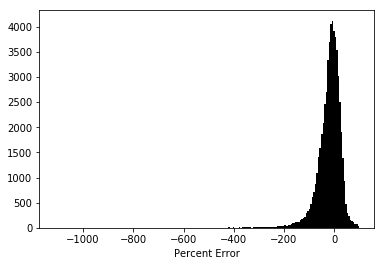

In [35]:
C = 100

y = np.array(I['SIGMA(IOBS)'])
x = np.vstack((I['FOBS']**2, I['D'], I['D']**(-2), I['ipm2']))
b = cvx.Variable()
w = cvx.Variable(x.shape[0])
#print(len(y))
xi,xistar = cvx.Variable(len(y)), cvx.Variable(len(y))
epsilon = 1
residuals = y - x.T*w - b
print("C={}".format(C))
loss = 0.5*cvx.norm2(w) + C*cvx.sum_entries(xi + xistar)
cons = [
     residuals <= epsilon + xi,
    -residuals <= epsilon + xistar,
    xi >= 0,
    xistar >= 0,
]
p = cvx.Problem(cvx.Minimize(loss), cons).solve(solver='SCS', verbose=True)
print(w.value)
print(b.value)
plt.hist(100.*np.array(residuals.value).flatten()/y, 200, color='k')
plt.xlabel('Percent Error')

print(np.mean(100.*np.array(residuals.value).flatten()/y))
print(np.median(100.*np.array(residuals.value).flatten()/y))



In [ ]:
w = cvx.Variable(2)

#x = 100.*np.array(I['IOBS'].rank()/I['IOBS'].rank().max())
#y = I['IOBS'] / I['SIGMA(IOBS)']
y = np.array(I['IOBS'] / I['SIGMA(IOBS)'])
#y = 100.*np.array(y.rank()/y.rank().max())


A_ = None
B_ = None
L_ = []
#loss = cvx.norm2(y - x*A - B)
#loss = cvx.norm2(y - x*A - B)
loss = cvx.norm2(y - x*A - B)
p = cvx.Problem(cvx.Minimize(loss)).solve(solver='SCS')
L_.append(loss.value)
A_,B_ = A.value,B.value


plt.scatter(x, y, facecolors='none', edgecolors='k', alpha=0.05)
plt.grid(linestyle='--')
xlim = plt.xlim()
ylim = plt.ylim()
xfit = np.linspace(xlim[0], xlim[1], 100)
yfit = A_*xfit + B_
plt.plot(xfit, yfit, '--r')
plt.xlabel(r"$I_{hkl}\ (percentile)$")
plt.ylabel(r"$\sigma_{I_{hkl}}\ (percentile)$")
plt.title(r"$y = {:0.2f}x + {:0.2f}$".format(A_, B_))

In [ ]:
_ = hist(x, 200)
plt.semilogy()
plt.semilogx()

In [ ]:
A,B,C = cvx.Variable(3)

x = np.array(I['IOBS'])
y = np.array(x/I['SIGMA(IOBS)'])

#x,y = standardize(x), standardize(y)

C_ =  0.
A_ = None
B_ = None
L_ = []
for i in range(5):
    loss = cvx.norm1(y*B + y*x - y*C_ - A*x - A*C_)
    p = cvx.Problem(cvx.Minimize(loss)).solve()
    L_.append(loss.value)
    A_,B_ = A.value,B.value
    loss = cvx.norm1(y*B_ + y*x - y*C - A_*x - A_*C)
    p = cvx.Problem(cvx.Minimize(loss)).solve()
    L_.append(loss.value)
    C_ = C.value



In [ ]:
ticks = np.logspace(0., np.ceil(np.log10(Z.max())), 1.+2.*np.ceil(np.log10(Z.max())))
ylim = (y.min(), y.max())
xlim = (np.percentile(x,0), np.percentile(x,98))
Z,X,Y = np.histogram2d(x, y, 100, (xlim, ylim))
Z += 1.
X,Y = np.meshgrid(0.5*(X[1:] + X[:-1]), 0.5*(Y[1:] + Y[:-1]))
norm = mpl.colors.LogNorm(Z.min(), Z.max())

logmax = np.ceil(np.log10(Z.max()))
plt.contourf(X,Y,Z.T, ticks, norm = norm)
plt.ylabel(r"$\frac {I} {\sigma_I}$", fontsize=16)
plt.xlabel(r"$I$", fontsize=16)
cbar = plt.colorbar(ticks=ticks)
cbar.ax.set_yticklabels([r"$10^{{{}}}$".format(np.log10(i)) for i in ticks])
xfit = np.linspace(xlim[0], xlim[1], 10000)
yfit = xfit*A_/(B_ + xfit) + C_
ymin,ymax = plt.ylim()
plt.plot(xfit, yfit, '--r')
plt.ylim(ymin, ymax)
plt.xlim(xlim[0], xlim[1])

In [ ]:
SNR = (A_*x) / (B_ + x) + C_
SIGMA_IOBS_ = (np.abs(x)*(B_+np.abs(x))/(A_*np.abs(x) + C_*(B_+np.abs(x))))

plt.scatter(y, SNR, facecolors='none', edgecolors='k', alpha=0.1)
plt.xlabel(r"$\frac{I} {\sigma_I}$", fontsize=16)
plt.ylabel(r"$\hat \frac{I} {\sigma_I}$", fontsize=16)
#plt.ylim(-100, 10000)